In [7]:
from scipy import stats
import pickle
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
data_folder = r"E:\data\gst-1102\max_normalized_3"
g_original_cog_performance_file = data_folder + r"\g_original_cog_performance_data_across_K"
g_original_performance_file = data_folder + r"\g_original_performance_data_across_K"
s_original_cog_performance_file = data_folder + r"\s_original_cog_performance_data_across_K"
s_original_performance_file = data_folder + r"\s_original_performance_data_across_K"
t_original_cog_performance_file = data_folder + r"\t_original_cog_performance_data_across_K"
t_original_performance_file = data_folder + r"\t_original_performance_data_across_K"

with open(g_original_performance_file, 'rb') as infile:
    g_original_performance = pickle.load(infile)
with open(g_original_cog_performance_file, 'rb') as infile:
    g_original_cog_performance = pickle.load(infile)
with open(s_original_performance_file, 'rb') as infile:
    s_original_performance = pickle.load(infile)
with open(s_original_cog_performance_file, 'rb') as infile:
    s_original_cog_performance = pickle.load(infile)
with open(t_original_performance_file, 'rb') as infile:
    t_original_performance = pickle.load(infile)
with open(t_original_cog_performance_file, 'rb') as infile:
    t_original_cog_performance = pickle.load(infile)

In [3]:
K_list = [0, 1, 2, 3, 4, 5, 6, 7, 8]
# distribution comparison
K = 0
list_a = g_original_performance[K]
list_b = s_original_performance[K]
list_c = t_original_performance[K]
for sample_size in [20, 50, 100, 200, 500, 1000]:
    list_a_2 = np.random.choice(list_a, sample_size, replace=False)
    list_b_2 = np.random.choice(list_b, sample_size, replace=False)
    list_c_2 = np.random.choice(list_c, sample_size, replace=False)
    t_value_1, p_value_1 = stats.ttest_ind(list_a_2, list_b_2)
    t_value_2, p_value_2 = stats.ttest_ind(list_b_2, list_c_2)
    print("sample_size: ", sample_size)
    print("a-b={0} (p-value={1})".format(np.mean(list_a_2)-np.mean(list_b_2), p_value_1))
    print("b-c={0} (p-value={1})".format(np.mean(list_b_2)-np.mean(list_c_2), p_value_2))


sample_size:  20
a-b=-0.017932342006987456 (p-value=0.35391713289447224)
b-c=-0.017244818594310263 (p-value=0.3623349712758649)
sample_size:  50
a-b=-0.0329069638276166 (p-value=0.004100166095332089)
b-c=-0.02807716320888376 (p-value=0.011727269451446722)
sample_size:  100
a-b=-0.02700480184641696 (p-value=0.002065014156607966)
b-c=-0.009796181780360347 (p-value=0.21924572335508924)
sample_size:  200
a-b=-0.02099679611337879 (p-value=0.0002396190795460387)
b-c=-0.017088760328298203 (p-value=0.0031778052754507257)
sample_size:  500
a-b=-0.01873546473493659 (p-value=1.4875304839234182e-07)
b-c=-0.021864982749858375 (p-value=4.931983160425323e-10)
sample_size:  1000
a-b=-0.016868502689621923 (p-value=1.3697270263489682e-11)
b-c=-0.021502790538420635 (p-value=3.1377106901830985e-18)


In [4]:
print("========G vs. S=========")
for index, K in enumerate(K_list):
    list_a = g_original_performance[index]
    list_b = s_original_performance[index]
    t_value, p_value = stats.ttest_ind(list_a, list_b)
    # print('Test statistic is %f'%float("{:.6f}".format(t_value)))
    # print('p-value for two tailed test is %f' % p_value)
    alpha = 0.05
    if p_value <= alpha:
        print("K={0}: {1} Sig. p-value={2}".format(K, sum(list_a) / len(list_a) - sum(list_b) / len(list_b), p_value))
    else:
        print("K={0}: {1} Not Sig.".format(K, sum(list_a) / len(list_a) - sum(list_b / len(list_b)), p_value))

print("========G vs. T=========")
for index, K in enumerate(K_list):
    list_a = g_original_performance[index]
    list_b = t_original_performance[index]
    t_value, p_value = stats.ttest_ind(list_a, list_b)
    # print('Test statistic is %f'%float("{:.6f}".format(t_value)))
    # print('p-value for two tailed test is %f' % p_value)
    alpha = 0.05
    if p_value <= alpha:
        print("K={0}: {1} Sig. p-value={2}".format(K, sum(list_a) / len(list_a) - sum(list_b) / len(list_b), p_value))
    else:
        print("K={0}: {1} Not Sig.".format(K, sum(list_a) / len(list_a) - sum(list_b / len(list_b)), p_value))

print("========S vs. T=========")
for index, K in enumerate(K_list):
    list_a = s_original_performance[index]
    list_b = t_original_performance[index]
    t_value, p_value = stats.ttest_ind(list_a, list_b)
    # print('Test statistic is %f'%float("{:.6f}".format(t_value)))
    # print('p-value for two tailed test is %f' % p_value)
    alpha = 0.05
    if p_value <= alpha:
        print("K={0}: {1} Sig. p-value={2}".format(K, sum(list_a) / len(list_a) - sum(list_b) / len(list_b), p_value))
    else:
        print("K={0}: {1} Not Sig.".format(K, sum(list_a) / len(list_a) - sum(list_b / len(list_b)), p_value))


print("========G across K=========")
for index, K in enumerate(K_list):
    if index == len(K_list) - 1:
        break
    list_a = g_original_performance[index]
    list_b = g_original_performance[index+1]
    t_value, p_value = stats.ttest_ind(list_a, list_b)
    # print('Test statistic is %f'%float("{:.6f}".format(t_value)))
    # print('p-value for two tailed test is %f' % p_value)
    alpha = 0.05
    if p_value <= alpha:
        print("K={0}: {1} Sig. p-value={2}".format(K, sum(list_a) / len(list_a) - sum(list_b) / len(list_b), p_value))
    else:
        print("K={0}: {1} Not Sig.".format(K, sum(list_a) / len(list_a) - sum(list_b / len(list_b)), p_value))

print("========S across K=========")
for index, K in enumerate(K_list):
    if index == len(K_list) - 1:
        break
    list_a = s_original_performance[index]
    list_b = s_original_performance[index+1]
    t_value, p_value = stats.ttest_ind(list_a, list_b)
    # print('Test statistic is %f'%float("{:.6f}".format(t_value)))
    # print('p-value for two tailed test is %f' % p_value)
    alpha = 0.05
    if p_value <= alpha:
        print("K={0}: {1} Sig. p-value={2}".format(K, sum(list_a) / len(list_a) - sum(list_b) / len(list_b), p_value))
    else:
        print("K={0}: {1} Not Sig.".format(K, sum(list_a) / len(list_a) - sum(list_b / len(list_b)), p_value))

print("========T across K=========")
for index, K in enumerate(K_list):
    if index == len(K_list) - 1:
        break
    list_a = t_original_performance[index]
    list_b = t_original_performance[index+1]
    t_value, p_value = stats.ttest_ind(list_a, list_b)
    alpha = 0.05
    if p_value <= alpha:
        print("K={0}: {1} Sig. p-value={2}".format(K, sum(list_a) / len(list_a) - sum(list_b) / len(list_b), p_value))
    else:
        print("K={0}: {1} Not Sig.".format(K, sum(list_a) / len(list_a) - sum(list_b / len(list_b)), p_value))

========G vs. S=========
K=0: -0.018501622904708803 Sig. p-value=0.0
K=1: -0.05392566184915826 Sig. p-value=0.0
K=2: -0.05337846719518968 Sig. p-value=0.0
K=3: -0.07986831359096225 Sig. p-value=0.0
K=4: -0.059673066498557636 Sig. p-value=0.0
K=5: -0.06300991896846486 Sig. p-value=0.0
K=6: -0.13607323247010195 Sig. p-value=0.0
K=7: -0.11617789403490597 Sig. p-value=0.0
K=8: -0.11508631367341071 Sig. p-value=0.0
========G vs. T=========
K=0: -0.03923062851743464 Sig. p-value=0.0
K=1: -0.029889325904866038 Sig. p-value=0.0
K=2: -0.025964501211675928 Sig. p-value=0.0
K=3: -0.04275227105231427 Sig. p-value=0.0
K=4: -0.032880746629390445 Sig. p-value=0.0
K=5: -0.03613795720075885 Sig. p-value=0.0
K=6: -0.04698877856215433 Sig. p-value=0.0
K=7: -0.05185849341428683 Sig. p-value=0.0
K=8: -0.04604430643526514 Sig. p-value=0.0
========S vs. T=========
K=0: -0.020729005612725837 Sig. p-value=0.0
K=1: 0.02403633594429222 Sig. p-value=0.0
K=2: 0.027413965983513755 Sig. p-value=0.0
K=3: 0.0371160425

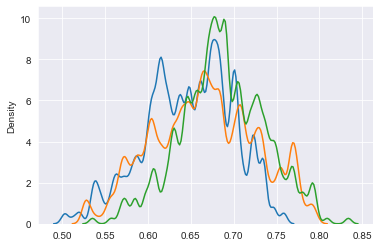

In [8]:
K = 0
list_a = g_original_performance[K]
list_b = s_original_performance[K]
list_c = t_original_performance[K]
# visualizing plot using matplotlib.pyplot library
sns.distplot(list_a, hist=False)
sns.distplot(list_b, hist=False)
sns.distplot(list_c, hist=False)
plt.show()